
# Project:TMDb Movie Data Analysis 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will analayze the data set of The Movie Database ( TMDb). This data set contains information about 10,000 movies between 1960 and 2015 , including user ratings , revenue and many other attributes. 

I will answer the following questions : Is the production of Movies increasing or decreasing through the years? What generes are most produced from year to year ?  What kind of properties are associated with movies that have the highest revenue ? In addition , I want to know if the movie that is based on a novel is  has more revenue than other movies / Is it more profitable? Finally, I want to know which movie earned the most and least profit across the years ? And if there is a relationship between the movie revenue and budget ?

To answer these questions , I will go into four phases of data analysis : data wrangling , data exploratory analysis , drawing conclusions from data , and communicating results. Each phase of these will explained in the next sections.

In [53]:
# these Python pachakges will help me in exploring and studying the data set thoroughly.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

After posing questions about the data set of TDMb mvoies, I will load in the data, check for its quality , and any structure problems and decide on needed data for the analysis. 

### General Properties

In [54]:
# Data are loaded with few lines printed just to show what type of data is in the TMDb Movie database and to check for 
# unneeded data

# the file is loaded here 
df = pd.read_csv('tmdb-movies.csv')
# the first 5 movies are displayed below
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<a id='observation1'></a>
### Data Observations

- There are many columns that must be omitted because it will not be useful in analayzing the data set of TDMb Movies such as :

   1. id and imdb_id : they are just id numbers will not have any meaningful use in this analysis.

   2. popularity,tagline , overview , homepage, vote_count, vote_average, budget and revenue.
    
    
- I will use the adjusted budget and revenue as they show the budget and revenue of the associated movies in terms of 2010 dollars, accounting for inflation.


- I can't  use vote_count and vote_average since the number of people who voted for movies differs for each movie , so this 
   will not lead to a fair comparison. For example, if a group of 100 voted for a movie with an average of 7 out of 10, and other group of 200 voted for another movie with an average of 7 out of 10 ; the comparison here is not fair (100 people aganist 200 people !).
   
   
-  The genres column that specifies the movie type needs to have one value represting the movie genre as it contains several values compbined together; it will make the analysis more easier.


- I need to change the release date to a month format to answer some questions of the study.


In [55]:
# displaying the (number of rows = number of movies) , and (columns = number of features)

rows , columns = df.shape

print("There are total movies of {} and {} features".format(rows-1,columns))

There are total movies of 10865 and 21 features


In [56]:
# This is a general summary statistics to just understand the database and decide on any needed changes 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='observation2'></a>
### Data Observations

- In the runtime column , I can notice that the minimum run time of a movie is 0 ; this means that there are movies with 
  un specified runtime , so I need to fix them. 
  
- In the budget and revenue columns , I noticed that the minimum value is 0 ; this means that there are movies with
  un specified values , so I need to fix them.
   

In [57]:
# Showing types of data in the TDMb Movies database and missing values from each row.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='observation3'></a>
### Data Observations

- The data type of budget and revenue columns is float , so I need to fix the data type to be an int just to make the analysis and the comparison much easier.

- There are missing data for cast , director , keywords , generes and production_companies columns.

## Data Cleaning 

 After some observations on the data set , I will start cleaning the database step by step to make it ready for the next phases. Data cleaning means modifying the data to be in the appropriate format for analysis.

### Deleting Un Needed Columns 

In [58]:
# Columns which are not needed are all deleted here
df.drop(['id','imdb_id','popularity','tagline', 'overview','homepage','vote_count','vote_average','budget','revenue' ],axis=1,inplace=True)
    

In [59]:
# checking the data set of TDMb Movies after deleting unneeded columns
df.head()

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,2015,137999939.3,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,2015,137999939.3,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2015,101199955.5,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,2015,183999919.0,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2015,174799923.1,1.385749e+09


### Dropping Rows with Null Values 

In [62]:
# dropping rows with any null values in TDMb movies database 
df.dropna(inplace=True)

In [63]:
# checking the database of TDMb movies after droping rows with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 11 columns):
original_title          8667 non-null object
cast                    8667 non-null object
director                8667 non-null object
keywords                8667 non-null object
runtime                 8667 non-null int64
genres                  8667 non-null object
production_companies    8667 non-null object
release_date            8667 non-null object
release_year            8667 non-null int64
budget_adj              8667 non-null float64
revenue_adj             8667 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 812.5+ KB


In [64]:
# checking the database of TDMb movies after droping rows with null values ; it should print false 
df.isnull().sum().any()

False

### Dropping Duplicate Rows

In [65]:
# checking if there is any duplicated data in the data set of TDMb movies ( if no duplicate , it will print false)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10834    False
10835    False
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 8667, dtype: bool

In [66]:
# checking the number of duplicated data in the data set of TDMb movies ( if no duplicate , it will print zero)
print(df.duplicated().sum())

1


In [67]:
# dropping duplicated rows 
df.drop_duplicates(inplace=True)

In [68]:
# checking the number of duplicated data in the data set of TDMb movies ( if no duplicate , it will print false)
print(df.duplicated().sum())

0


### Changing Data Types in Budget and Revenue Columns

In [69]:
# converting budget and revenue data type from float to int 

budget = np.array(df['budget_adj'])
df['budget_adj'] = pd.to_numeric(budget).astype(int)

revenue = np.array(df['revenue_adj'])
df['revenue_adj'] = pd.to_numeric(revenue).astype(int)

In [70]:
# checking budget_adj and revenue_adj data type after conversion 
df.dtypes

original_title          object
cast                    object
director                object
keywords                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

### Changing Zero Values in Runtime, Budget and Revenue Columns

In [71]:
# changing runtime with zero values with the mean of runtime of all movies
runtime = np.array(df['runtime'])
df['runtime']=df['runtime'].map( lambda x : runtime.mean() if x == 0 else x)

In [72]:
# changing budget with zero values with the mean of budget of all movies
budget = np.array(df['budget_adj'])
df['budget_adj']=df['budget_adj'].map( lambda x : budget.mean() if x == 0 else x)

In [73]:
# changing revenue with zero values with the mean of revenue of all movies
revenue = np.array(df['revenue_adj'])
df['revenue_adj']=df['revenue_adj'].map( lambda x : revenue.mean() if x == 0 else x)

In [74]:
# checking if there is any zero values in runtime row values
sum(df['runtime']==0)

0

In [75]:
# checking if there is any zero values in budget row values
sum(df['budget_adj']==0)

0

In [76]:
# checking if there is any zero values in revenue row values
sum(df['revenue_adj']==0)

0

### Changing the Keywords Column 

 To check for the unique data in the keywords column , I used the excel sheet because the column has multiple values. It was easier to search for keywords related to the novel based keyword. I found the keyword , novel_based , is the unique keyword used. There are other keywords like based on graphic novel , which I was not intrested to use. I only wanted movies based on a normal novel. 

In [77]:
# to make it easier to answer the analysis question "yes" and "no" will identify if the movie is based on a novel or not
df['keywords']=df['keywords'].map( lambda x :'yes' if 'based on novel' in x else 'no')

In [78]:
# checking if changes are made
df.head()

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,2015,137999939.0,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,2015,183999919.0,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2015,174799923.0,1.385749e+09


In [79]:
# modifying the column name to is_novel_based to make it more readable
df.rename(columns={'keywords':'is_novel_based'},inplace=True)

In [80]:
# checking if changes are made 
df.head()

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,2015,137999939.0,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,2015,183999919.0,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2015,174799923.0,1.385749e+09


### Changing Data Type  and Format of Release_date Column

In [81]:
# changing the release_date to datetime 
df['release_date'] = pd.to_datetime(df['release_date'])
# removing un needed parts of the release_date and keeping only the month data
df['release_date'] = df['release_date'].apply(lambda x: x.strftime('%m').lstrip('0'))

In [82]:
# checking if changes are made 
df.head()

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,2015,137999939.0,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,2015,183999919.0,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2015,174799923.0,1.385749e+09


In [83]:
# modifying the column name to release month to make it more readable
df.rename(columns={'release_date':'release_month'},inplace=True)

In [84]:
# checking if changes are made 
df.head()

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_month,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,2015,137999939.0,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,2015,183999919.0,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2015,174799923.0,1.385749e+09


### Computing profit using budget and revenue columns 

In [85]:
# using numpy arrays to make the subtraction operation faster 
revenue = np.array(df['revenue_adj'])
budget = np.array(df['budget_adj'])
df['profit'] = revenue - budget
# checking the new column profit 
df.head()

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_month,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,2015,137999939.0,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,2015,137999939.0,3.481613e+08,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2015,101199955.0,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,2015,183999919.0,1.902723e+09,1.718723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2015,174799923.0,1.385749e+09,1.210949e+09


### Modifying the Genres Column to contain only one value

In [86]:
# This code will take only the first value in the genre row 
df['genres'] = df['genres'].str.split('|').str[0]
# Checking the changes made
df.head()

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_month,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,no,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,6,2015,137999939.0,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,no,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5,2015,137999939.0,3.481613e+08,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,yes,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3,2015,101199955.0,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,no,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,12,2015,183999919.0,1.902723e+09,1.718723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,no,137.0,Action,Universal Pictures|Original Film|Media Rights ...,4,2015,174799923.0,1.385749e+09,1.210949e+09


### Description of Data After Data Wrangling and Cleaning 

1. Original Title : The title of the movie. 

2. Cast : The movie cast who played roles in the movie.

3. Director : The director of the movie.

4. Is novel based : indicating whether the movie is based on a novel or not ( Yes / No ).

5. Runtime : The runtime of the movie in minutes. 

6. Genres : The movies genres or types.

7. Production companies : The production companies of the movie.

8. Release month : The month in which the movie was released. 

9. Release year : The year in which the movie was released. 

10. Budget adj : The budget of the movie accounting for inflation in terms of 2010 in US $.

11. Revenue adj : The revenue of the movie accounting for inflation in terms of 2010 in US $.

12. Profit : The profit generated by the movie in US $.

### Saving the Cleaned Version of TDMb Movies Database

In [87]:
# This cleaned version of the data set for TDMb will be used for next data exploration phase
df.to_csv('tmdb-movies-cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis and Communicating Results

- After trimming and cleaning data, I'm ready to move on to exploration. This phase includes Computing statistics and creating visualizations to communicate the results with the goal of addressing the research questions that I posed in the Introduction section. 


In [88]:
# the file is loaded here 
df_cleaned = pd.read_csv('tmdb-movies-cleaned.csv')

### Research Question 1 (Is the Production of Movies Increasing or Decreasing Through the Years?)

In [89]:
# Preparing data for plotting 
number_of_movies= df_cleaned.groupby('release_year')['original_title'].count()
number_of_movies

release_year
1960     30
1961     28
1962     30
1963     33
1964     41
1965     33
1966     44
1967     34
1968     36
1969     25
1970     38
1971     54
1972     36
1973     55
1974     43
1975     40
1976     44
1977     54
1978     59
1979     54
1980     72
1981     74
1982     78
1983     74
1984     96
1985     96
1986    103
1987    104
1988    120
1989    118
1990    123
1991    111
1992    120
1993    165
1994    164
1995    159
1996    182
1997    174
1998    181
1999    198
2000    184
2001    196
2002    219
2003    214
2004    237
2005    299
2006    325
2007    347
2008    380
2009    413
2010    343
2011    383
2012    387
2013    456
2014    520
2015    440
Name: original_title, dtype: int64

Text(0.5,1,'Movies Production through the years')

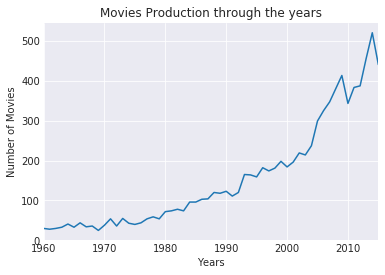

In [90]:
# plotting the data set prepared from previous step
graph=number_of_movies.plot()
# setting the label names and title 
graph.set_xlabel("Years")
graph.set_ylabel("Number of Movies")
graph.set_title("Movies Production through the years")

### Research Question 2 (Which genres are most produced between 1960-2015 ?)

In [91]:
# making the data frame ready to be plotted by grouping genres with their counts and then ordering them from the lowest to highest
genres=df_cleaned.groupby('genres').genres.count().sort_values()
genres

genres
Foreign               6
History              36
Western              39
TV Movie             51
War                  54
Music                72
Family              100
Mystery             104
Romance             139
Science Fiction     170
Documentary         225
Fantasy             225
Animation           287
Crime               341
Thriller            405
Adventure           511
Horror              738
Action             1334
Comedy             1849
Drama              1980
Name: genres, dtype: int64

Text(0.5,1,'Movie genres Production between 1960 and 2015')

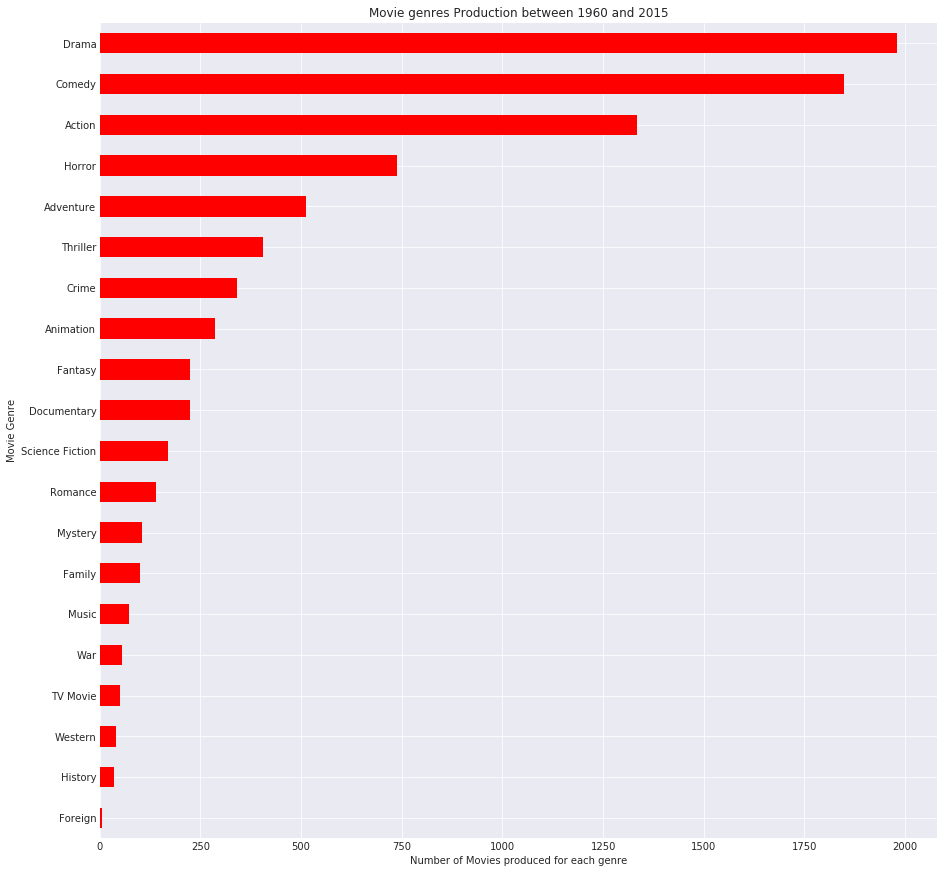

In [96]:
# plotting the data set prepared from previous step
fig, ax = plt.subplots(figsize=(15,15))
genres.plot(ax=ax,kind="barh",colormap='hsv')
# setting the label names and title 
ax.set_xlabel('Number of Movies produced for each genre')
ax.set_ylabel('Movie Genre')
ax.set_title("Movie genres Production between 1960 and 2015")

### Research Question 3 (Is there a relationship between revenue and budget ?)

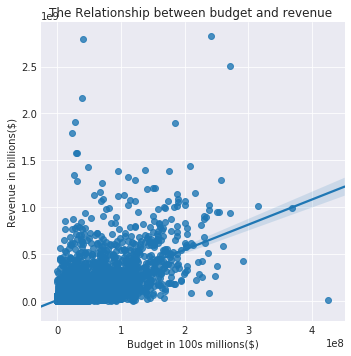

In [97]:
# setting the x and y axis values 
plot = sns.lmplot(x="budget_adj", y="revenue_adj", data=df_cleaned)
# add approptiate labels for the scatter plot
plot = plot.set(ylabel='Revenue in billions($)', xlabel='Budget in 100s millions($)', title ='The Relationship between budget and revenue ') 


In [98]:
# calculating the correlation coefficient between budget and revenue columns
df_cleaned['budget_adj'].corr(df_cleaned['revenue_adj'])

0.58600186740289806

### Research Question 4( What kind of properties are associated with movies that have high revenues  ?)


In [99]:
# filtering the data by taking movies with the highest revenues ( They are higher than the mean)
movies_high_revenues= df_cleaned.query('revenue_adj > revenue_adj.mean()')
# getting some statistical information about the data set
movies_high_revenues.describe()

,runtime,release_month,release_year,budget_adj,revenue_adj,profit
count,1555.000000,1555.000000,1555.000000,1.555000e+03,1.555000e+03,1.555000e+03
mean,114.987138,7.375563,1999.268810,7.080184e+07,2.982825e+08,2.274807e+08
std,26.119315,3.306975,12.483442,5.248005e+07,2.682952e+08,2.505662e+08
min,44.000000,1.000000,1960.000000,2.240000e+02,9.394704e+07,-6.387504e+07
25%,99.000000,5.000000,1992.500000,2.973746e+07,1.366174e+08,8.731945e+07
50%,112.000000,7.000000,2002.000000,5.816388e+07,2.050820e+08,1.426771e+08
75%,126.000000,11.000000,2009.000000,9.714804e+07,3.532650e+08,2.756218e+08
max,705.000000,12.000000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [119]:
# getting the common genre type associated with the highest revenue
genres=movies_high_revenues.groupby("genres")['revenue_adj'].mean().sort_values(ascending=False)

genres

genres
Adventure          4.476523e+08
Family             4.234551e+08
Animation          3.978178e+08
Science Fiction    3.809900e+08
War                3.318069e+08
Fantasy            3.222053e+08
Action             3.122512e+08
History            2.925757e+08
Mystery            2.787161e+08
Music              2.609423e+08
Drama              2.512377e+08
Western            2.485760e+08
Romance            2.410854e+08
Thriller           2.317608e+08
Crime              2.265296e+08
Comedy             2.224127e+08
Horror             2.091204e+08
Documentary        1.158575e+08
Name: revenue_adj, dtype: float64

Text(0.5,1,'Average revenue for each movie genre')

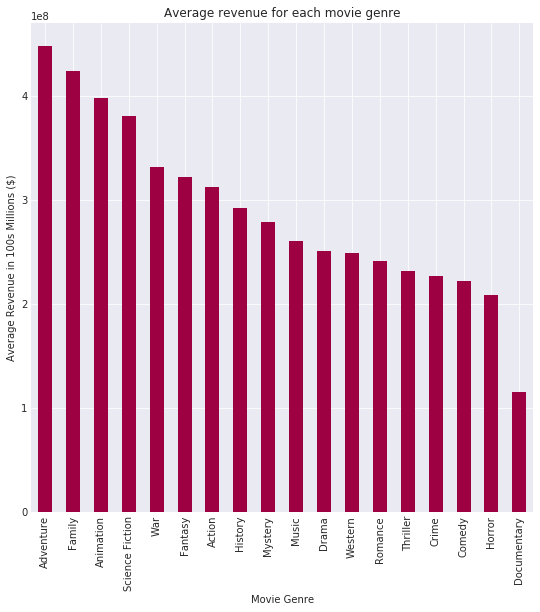

In [120]:
# setting the plot bar type , color , size , and labels
fig, ax = plt.subplots(figsize=(9,9))
genres.plot(ax=ax,kind="bar",colormap='Spectral')
ax.set_xlabel('Movie Genre')
ax.set_ylabel('Average Revenue in 100s Millions ($)')
ax.set_title('Average revenue for each movie genre')

In [103]:
# getting the common month associated with the highest revenue
months_rev=movies_high_revenues.groupby("release_month")['revenue_adj'].mean()

months_rev

release_month
1     2.332247e+08
2     2.009587e+08
3     2.807994e+08
4     2.857050e+08
5     4.033266e+08
6     3.538509e+08
7     3.096100e+08
8     2.166811e+08
9     2.156818e+08
10    2.541074e+08
11    3.470269e+08
12    2.990556e+08
Name: revenue_adj, dtype: float64

Text(0.5,1,'Average revenue for movies in each month')

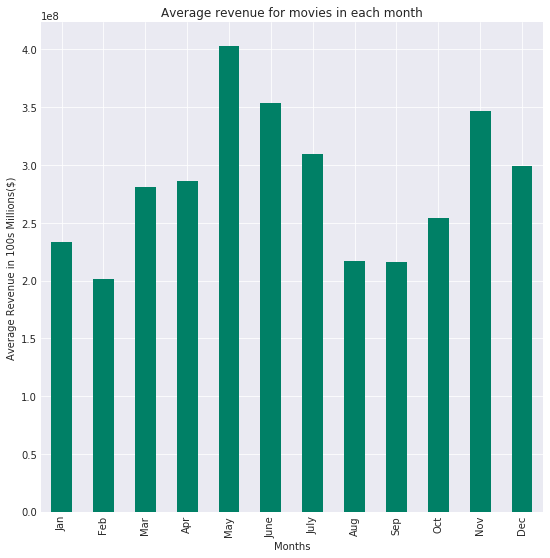

In [121]:
# setting the x labeles names 
months=["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
fig, ax = plt.subplots(figsize=(9,9))
months_rev.plot(ax=ax,kind="bar",colormap='summer')
ax.set_xlabel('Months')
ax.set_ylabel('Average Revenue in 100s Millions($)')
ax.set_xticklabels(months)
ax.set_title('Average revenue for movies in each month')

### Research Question 5( Are novel based movies have a higher revenue / profit ?) 

Text(0.5,1,'Average revenue for novel based movies and un novel based movies')

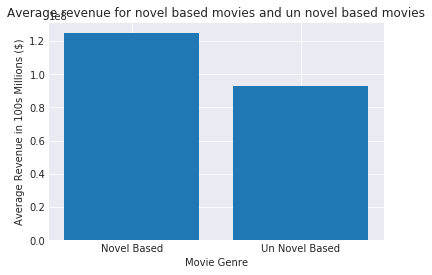

In [122]:
# Prepring data set for plotting
# the first data set with novel based movies with its mean revenue
novel_based = df_cleaned.query('is_novel_based in ["yes"]')['revenue_adj'].mean()
# the second data set with un novel based movies with its mean revenue
not_novel_based= df_cleaned.query('is_novel_based in ["no"]')['revenue_adj'].mean()

# plotting the two data sets 
plt.bar(["Novel Based", "Un Novel Based"], [novel_based ,not_novel_based])
plt.xlabel("Movie Genre")
plt.ylabel("Average Revenue in 100s Millions ($)")
plt.title("Average revenue for novel based movies and un novel based movies")


Text(0.5,1,'Average profit for novel based movies and un novel based movies')

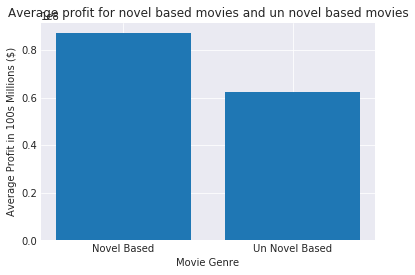

In [123]:
# Prepring data set for plotting
# the first data set with novel based movies with its mean profit
novel_based = df_cleaned.query('is_novel_based in ["yes"]')['profit'].mean()
# the second data set with un novel based movies with its mean profit
not_novel_based= df_cleaned.query('is_novel_based in ["no"]')['profit'].mean()

# plotting the two data sets 
plt.bar(["Novel Based", "Un Novel Based"], [novel_based ,not_novel_based])
plt.xlabel("Movie Genre")
plt.ylabel("Average Profit in 100s Millions ($)")
plt.title("Average profit for novel based movies and un novel based movies")


### Research Question 6 ( What movie genre is mostly produced each year ?) 

In [108]:
# preparing the data set to be plotted
groups=["release_year","genres"]

# grouping the data set by release_year and genres and selecting the top generes produced at each year
genres=df_cleaned.groupby(groups).genres.agg('count').sort_values().groupby(level=0).tail(1)

# ordering the data set by years ( the index was changed to release_year by the previous line)
genres =genres.sort_index()


Text(0.5,1,'Most produced movie genre in each year (1960 -2015)')

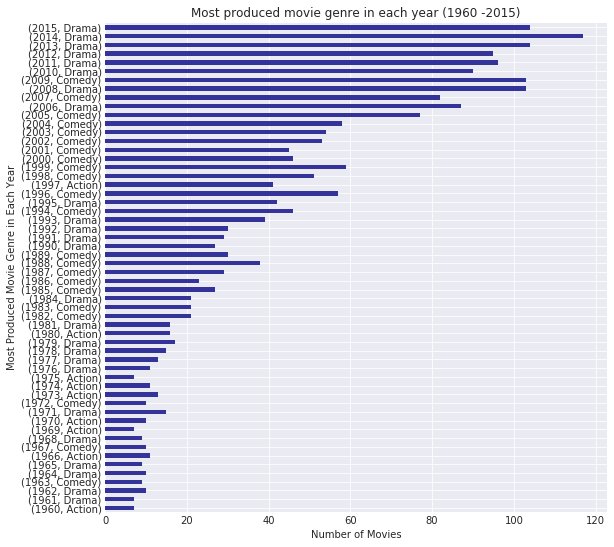

In [109]:
fig, ax = plt.subplots(figsize=(9,9))
genres.plot(ax=ax,kind="barh",colormap='terrain')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Most Produced Movie Genre in Each Year')
ax.set_title('Most produced movie genre in each year (1960 -2015)')

### Research Question 7 ( What is the most profitable and least profitable movie between 1960 - 2015 ?) 

In [110]:
# getting the movie row with the highest porfit 
df_cleaned.query('profit== profit.max()')

,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_month,release_year,budget_adj,revenue_adj,profit
960,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,no,121.0,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,3,1977,39575591.0,2.789712e+09,2.750137e+09


In [116]:
# getting the movie row with the lowest profit
df_cleaned.query('profit == profit.min()')


,original_title,cast,director,is_novel_based,runtime,genres,production_companies,release_month,release_year,budget_adj,revenue_adj,profit
1689,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,no,100.0,Adventure,Boram Entertainment Inc.,12,2010,425000000.0,11087569.0,-413912431.0


<a id='conclusions'></a>
## Conclusions

1. Is the production of movies increasing or decreasing through the years? 

   I can see from the plot that the production of movies is actually increasing since 1960. These is a peak in 2010.




2. Which genres are most produced between 1960-2015 ?

   I can see from the bar chart that the three top produced movies genres are Drama , Comedy , and finally Action.
   
   
   
   
3. Is there a relationship between revenue and budget ?
   
   I can see from the scatter plot that the relationship between budget spend on producing movies and the revenue generated 
   
   is moderate with a correlation coefficient of ( 0.59 ) . There are movies produced with low budget ; nevertheless , they
   
   earned a high revenue. On the other hand , there are movies produced with a high budget , but earned a low revenue.
  
   
4. What kind of properties are associated with movies that have high revenues ?

   - The average runtime is 115 minutes. 
   - The average budget is 70,801,840 \\$.
   - The average revenue is 298,282,500 \\$.
   - The average proift is 227,480,700 \\$.
   - The top common movies genres are Adventure , Family and Animation.
   - The top common release months are May , June , and November.
   
   
   
5. Are novel based movies have a higher revenue / profit ?

   I can see from the two bar charts that novel based movies have the highest revenue and profit than un novel based movies. 
   
  
   
   
6. What movie genre is mostly produced each year ?

   I can see that Drama , Comedy and Action are the mostly produced movies genres through the years. 


- My final comment : This study can help actors and producers to take critical decsions about movies like What type of movie to produce ? Should I act in this movie ? What is the expected revenue and profit if I produced this movie ? etc. However , the data set can be adjusted to account for inflation for each year in terms of 2019 as it's the current year. I consider the results as an estimate. There are some deleted movies for missing data and this for sure will affect the results somehow.

### Resources 

[Link 1](https://www.officialdata.org/us/inflation/1960?amount=100
)

[Link 2](https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
)

[Link 3](https://stackoverflow.com/questions/37506488/python-pandas-dataframe-replace-0-with-median-value
)

[Link 4](https://knowledge.udacity.com/questions/17467
)

[Link 5](https://stackoverflow.com/questions/7618863/remove-leading-0s-for-strdate
)

[Link 6](https://matplotlib.org/gallery/lines_bars_and_markers/barh.html
)

[Link 7](https://stackoverflow.com/questions/51053911/get-max-of-count-function-on-pandas-groupby-objects
)

[Link 8](https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
)

[Link 9](https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot/27520877
)

[Link 10](
https://mode.com/example-gallery/python_horizontal_bar/
)

[Link 11](
https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe
)

[Link 12](https://stackoverflow.com/questions/47000959/how-to-calculate-the-correlation-coefficient-of-grouped-quantities-in-pandas?rq=1
)

[Link 13](
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
)

[Link 14](https://stackoverflow.com/questions/25715333/in-python-plots-what-does-le8-mean-in-reference-to-the-y-axis
)

[Link 15](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
)

[Link 16](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
)

[Link 17](https://nortonsafe.search.ask.com/web?q=colormap%20colors&ssdcat=321&installsource=nag&source=nag&year=2015&locale=en_us&geo=us&version=22.16.3.21&templatecat=sbu_w_1000_5039_ns_retail_2&schemacat=sbu_w&schemaver=1.0.0.0&olpchannel=retail&osvers=10.0&oslocale=iso:usa&oslang=iso:eng&os=windows&showuninstallsurvey=1&installstatus=updated&vendor=none&vendorsrc=firefox&vendortesteligible=no&machinelocation=205&tb=2&sw=0&3in1=0&hp=0&dsp=0&o=APN12174&prt=ngc&ver=3.3.0.4&tpr=111&chn=1008610&guid=f6aae9f0-bfea-45db-84a9-19c51b928afc&doi=2019-01-16
)


In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0